# Serve, Rally, Analyze: Unraveling Tennis Player Handedness with Data Science

#### By Qian Xinyu, Annabelle Perry, Alex Wang, ...【please sign your name here:)】

### Introduction:

Tennis, a sport known for its dynamic and individualistic nature, has witnessed the rise of numerous talented players over the years. Our project focuses on predicting the fundamental aspect of a tennis player’s game - their handedness. Handedness, a very important part of a player’s playing style, has been a subject of intrigue, prompting us to explore the correlation with ranking, age, and handedness. 

Handedness is more than a mere technical detail as it is a defining characteristic that influences a player’s shot selection, court coverage, and overall gameplay. It has been found that the ball distribution and the angle of lateral ball flight differ between right- and left-handed servers (Loffing et al., 2009). Additionally, players who use their left hand may possess an advantage in terms of both strategy and technical skills. Amongst the most famous tennis players, despite being naturally right-handed, Rafael Nadal was urged by his uncle and coach to play tennis using his left hand as it was thought to be advantageous (Nadal & Carlin, 2012). It is commonly thought that left-handed people have superior spatial, motor, and attention functions overall (Breznik, 2013). Handedness raises the compelling question of how it shapes a player’s approach on the court thus their success in ranking. 

The primary question driving our project is can a tennis player’s handedness be predicted or classified based on their age and current rank? By exploring this question, we aim to uncover potential relationships and patterns that illuminate the dynamics between player’s age, standing ranks, and preferred handedness. While there is an uneven distribution with more individuals in the right-handed sample group, we hypothesize that a higher proportion of left-handed players in our data set may correlate with higher rankings.

To address this question, we turn to the data set provided by Ultimate Tennis Statistics (UTS), a comprehensive repository of detailed information on the top 500 tennis players. This data set includes essential attributes vital to our research question, including age, rank, and, significantly, the handedness of each player. By strategically curating our data set, we have excluded extraneous variables such as country of origin and player name. The rank acts as a snapshot of a player’s standing in the world of competitive tennis. Most critically, the labelled information on handedness forms the basis of our predictive modelling thus guiding our exploration.


In [1]:
#this part below can be used in the introduction and then rewritten in a way for the impact part of the discussion)

The choice to investigate the handedness of forehand and backhand plays stems from its key role in a player’s strategy and overall performance on the court. As a fundamental aspect of a tennis player’s skill set, the forehand may hold valuable insights into patterns and trends that could correlate with success, both on the scoreboard and in terms of ranking. 
Our inquiry holds implications not only for the field of sports analytics but also for players, coaches, and enthusiasts seeking a deeper understanding of the factors influencing success in the sport. Through thoughtful statistical techniques and data analysis, we hope to contribute valuable insights to the broader discussion surrounding the complicated nature of achievement in professional tennis.  


### Methods & Results:

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

Before we attempted to read in the data set that we have chosen, the first thing to prepare would be reading in all of the necessary R packages from the library that we would need to analysis the data, which is exactly what we have done in the above cell. For this project, we have used the tidyverse, repr, and the tidymodels package, which are all commonly used and friendly to new users of the R language.

In [3]:
url <- "https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"
player_data <- read_csv(url)
player_data

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,NA,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Table 1: The original data set before any change; read directly from the web.

After we have loaded in the packages, we would then be able to begin our data analysis! Which would start with us reading in the original data set from our sources, and we choose to read from the web since this is the most convenient way for everyone who are able to look into this file as it does not require the file for the data set being downloaded locally already for anyone who wants to run the codes.

In [26]:
player_data_renamed <- player_data |>
               rename_at(6, ~'Current_Rank')

player_data_goal <- player_data_renamed [c('Plays', 'Age', 'Current_Rank')] #data we care about the most
player_data_goal #data we care about the most

important_data <- group_by(player_data_goal, Plays, Current_Rank, Age)

Plays,Age,Current_Rank
<chr>,<chr>,<chr>
Right-handed,26 (25-04-1993),378 (97)
Left-handed,18 (22-12-2001),326 (119)
Right-handed,32 (03-11-1987),178 (280)
⋮,⋮,⋮
Left-handed,23 (14-03-1996),495 (60)
NA,24 (17-05-1995),419 (81)
Left-handed,22 (26-03-1997),451 (69)


Table 2: Data that we need to perform the data analysis for our question.

In [27]:
player_data_rows <- nrow(player_data_goal) #number of total rows in the dataframe
player_data_rows #number of total rows in the dataframe

player_data_NA <- colSums(is.na(important_data)) #provides the number of NA values
player_data_NA #provides the number of NA values

player_data_type <- player_data_goal |>
                    count(Age, sort = TRUE) #number of observation in the the classes that we are interested with
player_data_type #number of observation in the the classes that we are interested with

[1] 500

Plays          Age Current_Rank 
          47            1            5

Age,n
<chr>,<int>
19 (26-10-2000),2
20 (02-04-1999),2
21 (13-08-1998),2
⋮,⋮
38 (21-01-1982),1
40 (28-02-1979),1
NA,1


Table 3: Number of observations in the "Age" variable. (Sorted)

In [19]:
player_data_type2 <- player_data_goal |>
                     count(Current_Rank, sort = TRUE) #number of observation in the the classes that we are interested with
player_data_type2 #number of observation in the the classes that we are interested with

Current_Rank,n
<chr>,<int>
NA,5
1 (10235),1
10 (2565),1
⋮,⋮
97 (575),1
98 (575),1
99 (574),1


Table 4: Number of observations in the "Current_Rank" variable. (Sorted)

The above few cell have showed some important properties of the data frame that we would want to work with directly. We first renamed the variable "Current Rank" since it had space between it and the presence of the space would make the coding later on more difficult. Then, we selected the variables that we are interested with and turn them into a data frame sliced from the original data set and used the function "group_by" to group by the variables for future coding convenience. Lastly, we found out the numbers of rows in the data frame, the numbers of NA values in the data frame, and two sorted tables of the variable "Current_Rank" and "Age" that indicated the numbers of observations.

In [29]:
options(repr.plot.width = 15, repr.plot.height = 15)
Plays_table <- filter(player_data_goal, Plays != "NA", Current_Rank != "NA", Age != "NA")

Player_data_optimized <- separate(Plays_table, col = Age, into = c("Age", "Year"), sep = " ")

Player_data_optimized2 <- separate(Player_data_optimized, col = Current_Rank, into = c("Current_Rank", "N1"), sep = " ")

Player_data_selected <- select(Player_data_optimized2, Plays, Age, Current_Rank)

player_data_better <-  mutate(Player_data_selected, Plays = as_factor(Plays), Age = as.numeric(Age), Current_Rank = as.numeric(Current_Rank))
player_data_better

Plays,Age,Current_Rank
<fct>,<dbl>,<dbl>
Right-handed,26,378
Left-handed,18,326
Right-handed,32,178
⋮,⋮,⋮
Right-handed,26,5
Left-handed,23,495
Left-handed,22,451


Table 5: The cleaned data frame that have been changed to be easily used for classification purposes with all of the variables that we cares about the most.

Within the cells above, we have filtered out all of the rows that contains NA values in the data frame and separated the extra information in brackets for the variable "Age" and "Current_Rank" to new columns "Year" and "N1," which was then discarded after the followed select() function to create a new cleaned data frame. After that, since all of the variables left seems to be in "chr" (characters) and that can not be used for classification codes, we turned the variables "Age" and "Current_Rank" to "dbl" (numeric with decimals) and "Plays" into "fct" (factors) using the mutate(), as_factor(), and as_numeric() functions. We also knows that after we cleaned the NA values out of the data frame, we have a reduced numbers of rows to 452 currently in the data frame.

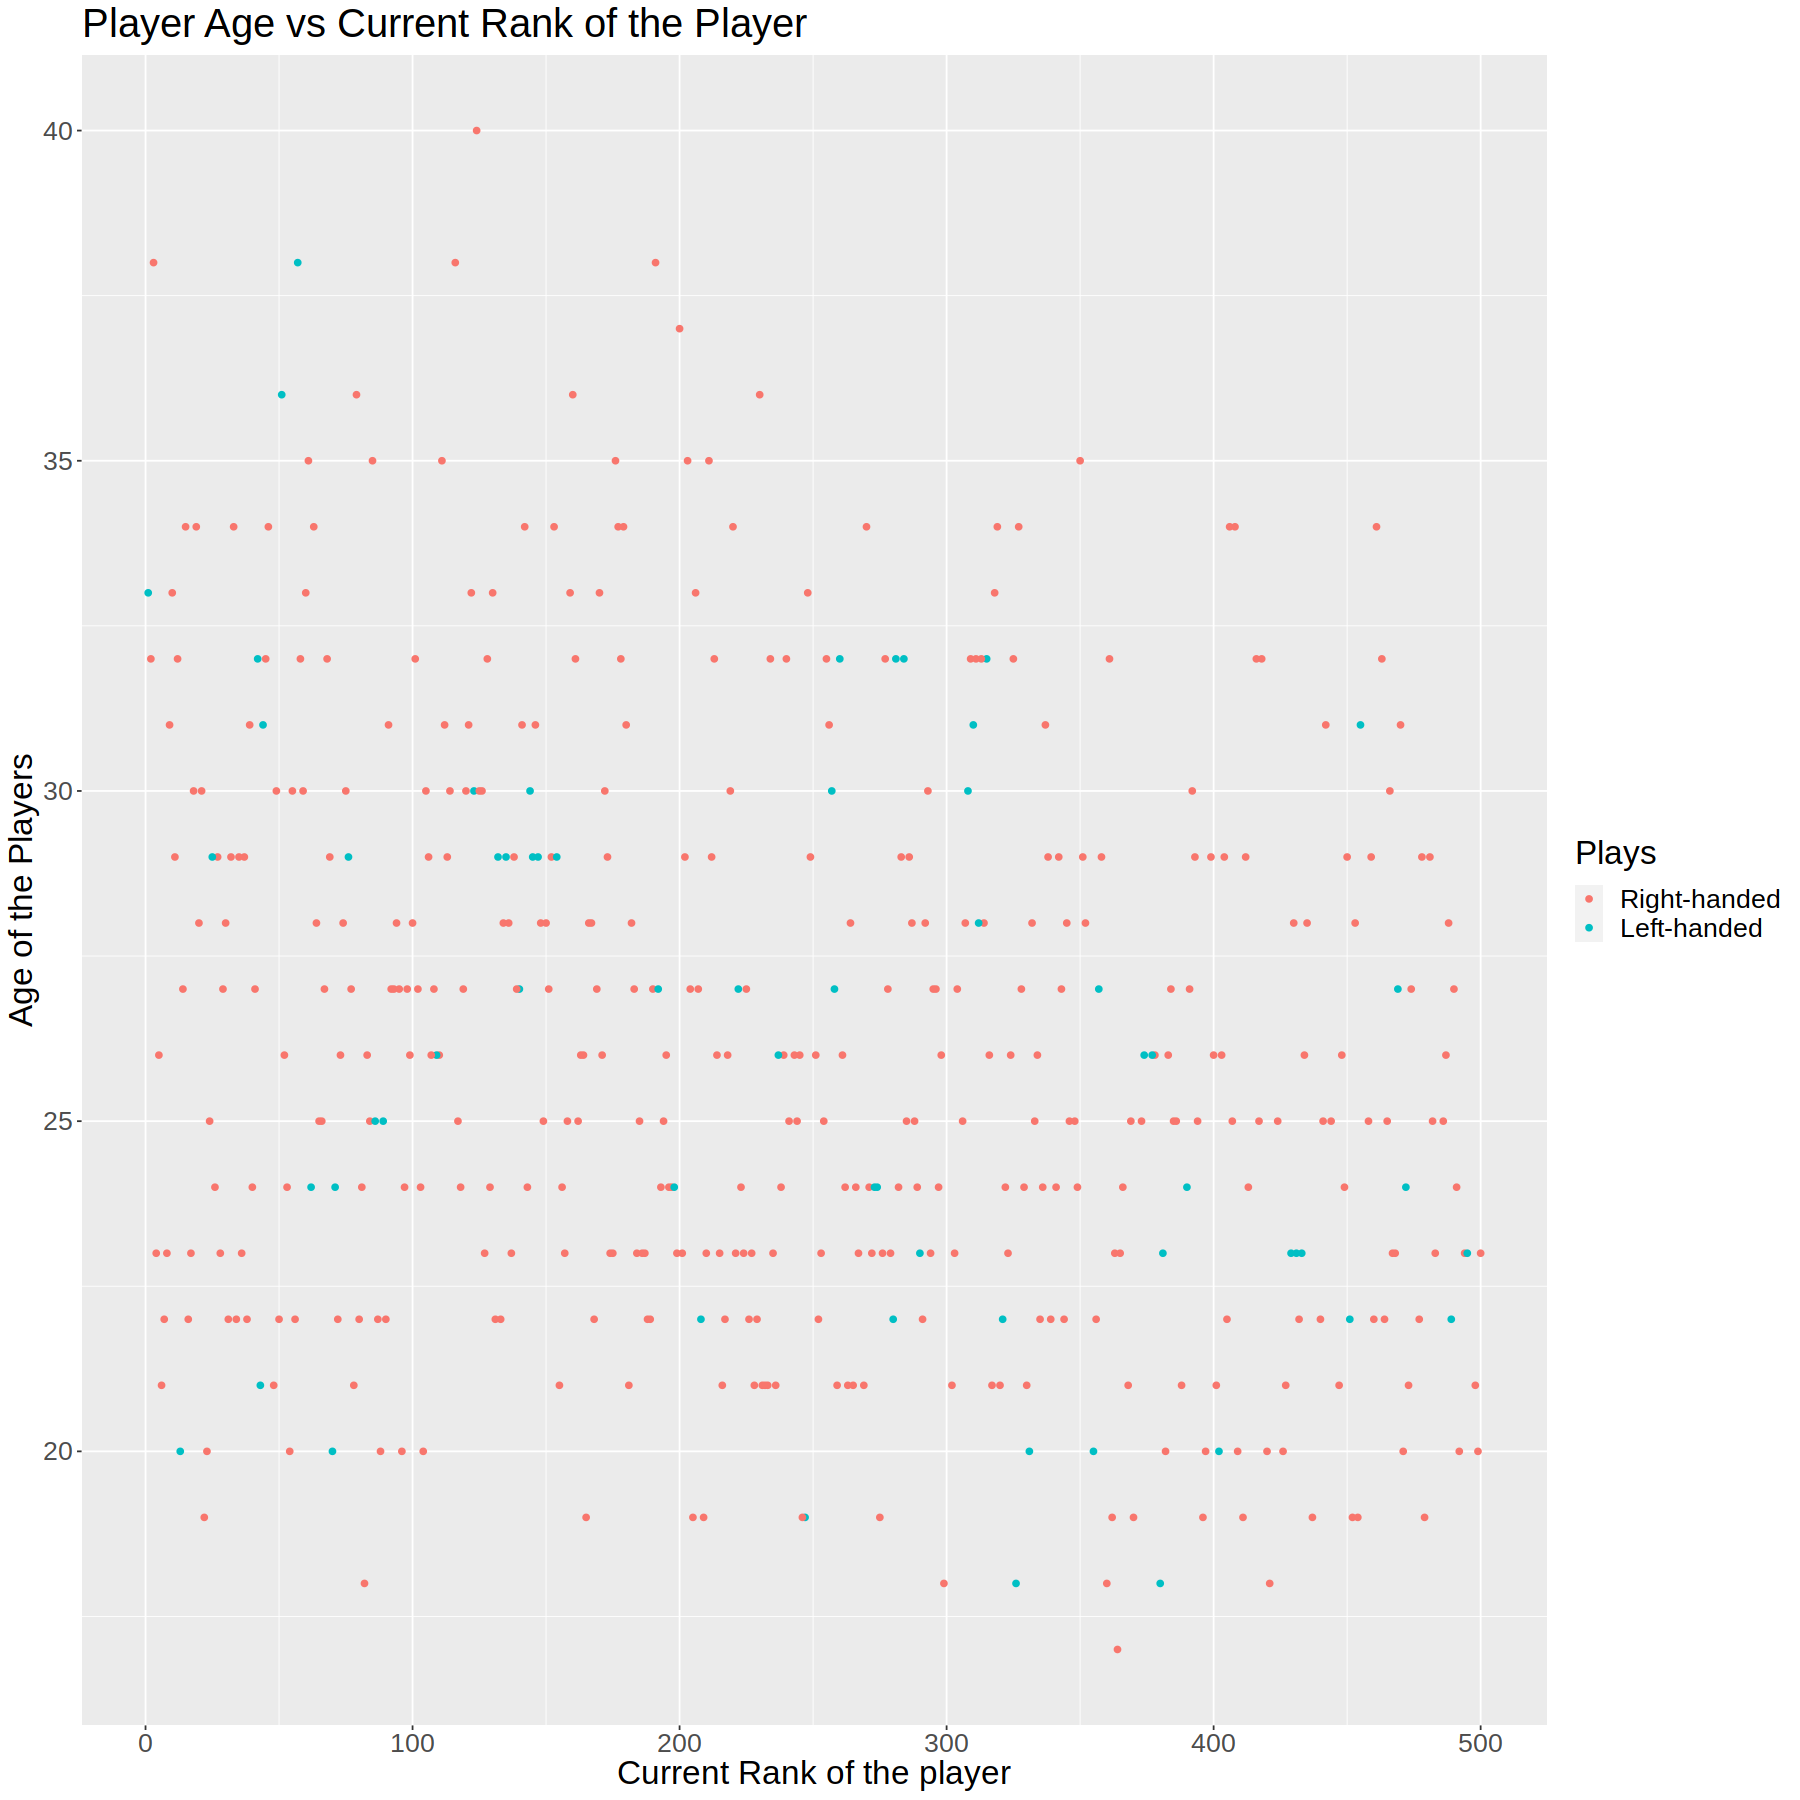

In [32]:
player_data_plot_cr <- player_data_better |>
                          ggplot(aes(x = Current_Rank, y = Age, color = Plays)) +
                          geom_point() +
                          xlab("Current Rank of the player") +
                          ylab("Age of the Players") +
                          ggtitle("Player Age vs Current Rank of the Player") +
                          theme(text = element_text(size=20))
player_data_plot_cr

Figure 1: The visualization for the relationship between the current rank of the player, their age, and their handedness, while the current rank is in the x-axis, age is in the y-axis, and the handedness is the different colors of the points. The graph is made to be readable to humans and a legend is contained at the right side.

In [34]:
set.seed(3456) 

player_data_split <- initial_split(player_data_better, prop = 0.75, strata = Plays)

player_data_train <- training(player_data_split)

player_data_test <- testing(player_data_split)

After we have created the best data frame to be used for classification and have a basic understanding of the relationships between the three variables, we can begin to split the data frame into testing data and training data using the function initial_split() to cut the data into the proportion we like and the functions training() and testing() to divide up the training set of data and the testing set of data, which is exactly what we have done in the above cells. The set.seed() function is also used here and in further codes to keep the randomness of the data frame and actions that we would later perform to the data frame.

In [42]:
options(repr.plot.width = 8, repr.plot.height = 8)
set.seed(1234)

player_vfold <- vfold_cv(player_data_train, v = 5, strata = Plays)

player_recipe <- recipe(Plays ~ Current_Rank + Age, 
                        data = player_data_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 20))

knn_results <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = player_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7690779,5,0.01581250,Preprocessor1_Model01
2,accuracy,binary,0.7690779,5,0.01581250,Preprocessor1_Model02
3,accuracy,binary,0.8076644,5,0.01826816,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
18,accuracy,binary,0.8639469,5,0.002251344,Preprocessor1_Model18
19,accuracy,binary,0.8639469,5,0.002251344,Preprocessor1_Model19
20,accuracy,binary,0.8639469,5,0.002251344,Preprocessor1_Model20


Table 6: The properties of different $K$ values used for our classification model, but the observations under the column means are what we care about the most as they contains the approximate accuracy of each $K$ value.

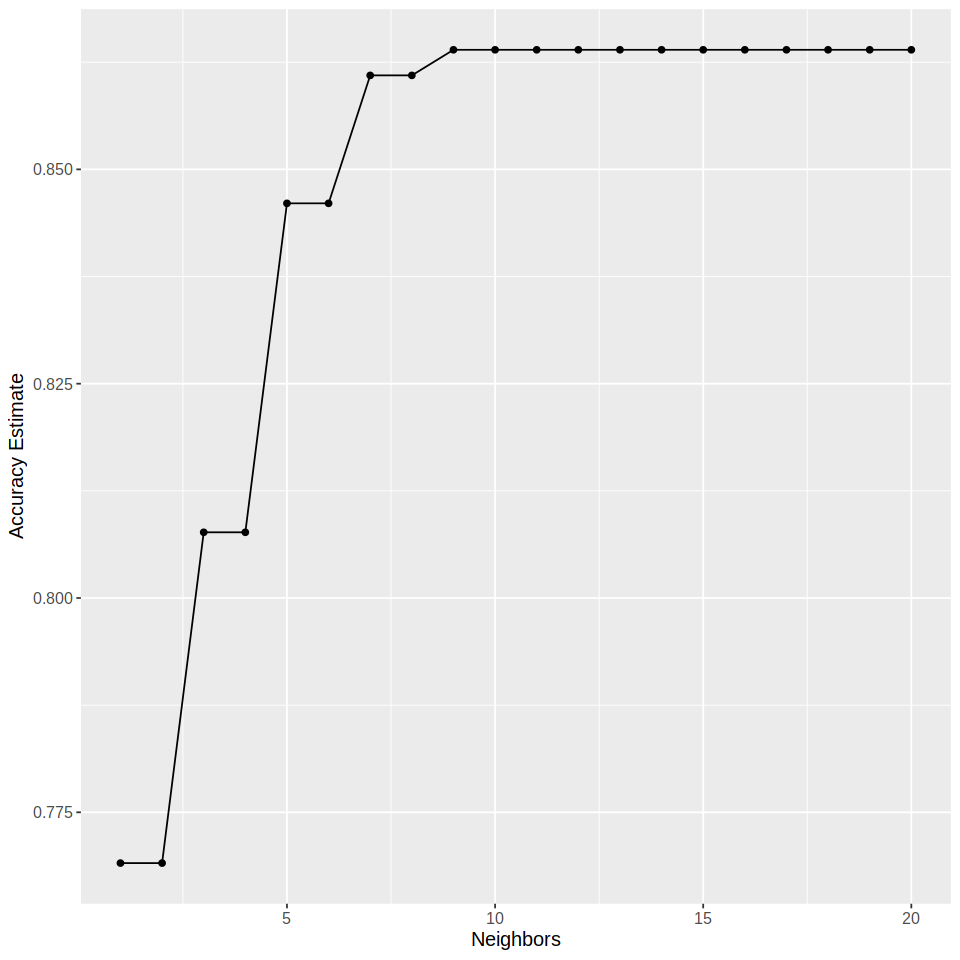

In [43]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))
accuracy_vs_k

Figure 2: This graph shows the relationship between the different numbers of $K$ values and the estimated accuracy corresponding to them, we could use this graph to choose what $K$ value can provide the most accuracy in approximations and should be the $K$ value that we would use in our classification model. From this graph, we can say that $K$ from 9 to 20 all have the similar highest accuracy, but we would choose $K$ = 9 since it is the first point that have achieve the best precision.

In [9]:
set.seed(4761)
knn_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
       set_engine("kknn") |>
       set_mode("classification")

player_fit <- workflow() |>
       add_recipe(player_recipe2) |>
       add_model(knn_spec_final) |>
       fit(data = player_data_train)

new_player <- tibble(Age = 25, Best_Rank = 125, Current_Rank = 200)

player_test_predictions <- predict(player_fit , new_player)
player_test_predictions

.pred_class
<fct>
Right-handed


### Discussion:

### References

Loffing, F., Hagemann, N., & Strauss, B. (2009). The Serve in Professional Men’s Tennis: Effects of Players’ Handedness. International Journal of Performance Analysis in Sport, 9(2), 255–274.
https://doi.org/10.1080/24748668.2009.11868482

Breznik, K. (2013). On the gender effects of handedness in professional tennis. Journal of Sports Science and Medicine, 12(2), 346–353.
Nadal, R., Carlin, J. (2012). Rafa: My story. Sphere.
